In [1]:
import navis 
import navis.interfaces.neuprint as neu
import neuprint as neu_orig
import NeuromodPlasticity as nmp 

import pathlib
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd

plt.rcParams['pdf.fonttype']=42

%load_ext autoreload
%autoreload 2 


%matplotlib inline

In [2]:
c = nmp.connectomics.npt_client()

In [3]:

ebcoords = nmp.connectomics.EBCoordinateSystem()

/home/mplitt/repos/NeuromodPlasticity/NeuromodPlasticity/connectomics.py:150: UserWarning: 
The coefficients of the spline returned have been computed as the
minimal norm least-squares solution of a (numerically) rank deficient
system (deficiency=92). If deficiency is large, the results may be
inaccurate. Deficiency may strongly depend on the value of eps.
  self._xsec_rad_spline = sp.interpolate.LSQBivariateSpline(eb_phase, xsec_phase, xsec_rad, knots, knots)


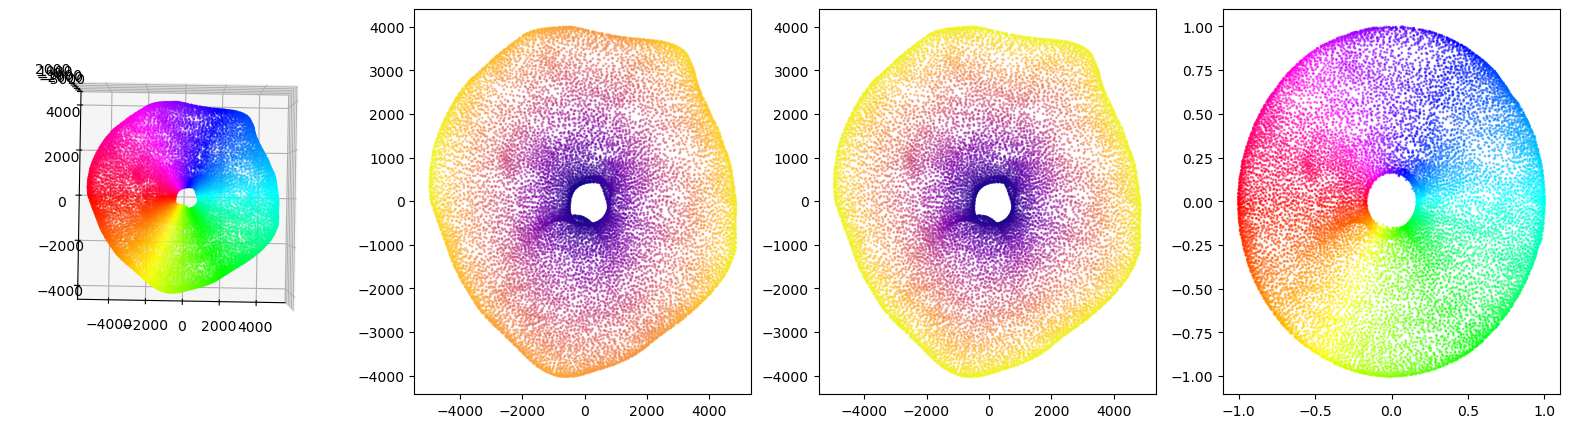

In [ ]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(141, projection='3d')
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)


ax.scatter(ebcoords.eb_vertices[:, 0],
            ebcoords.eb_vertices[:, 1], ebcoords.eb_vertices[:,2],
            c=ebcoords.eb_vertices_circ['phase'], s=1, alpha=0.5, cmap='hsv')
ax.elev = 90
ax.roll = 30

ax2.scatter(ebcoords.eb_vertices[:, 0], ebcoords.eb_vertices[:, 1], 
            c=ebcoords.eb_vertices_circ['radius'], s=1, alpha=0.5, cmap='plasma')
ax3.scatter(ebcoords.eb_vertices[:, 0], ebcoords.eb_vertices[:, 1], 
            c=ebcoords.eb_vertices_circ['radius_scaled'], s=1, alpha=0.5, cmap='plasma')


eb_sc_x = np.cos(ebcoords.eb_vertices_circ['phase']) * ebcoords.eb_vertices_circ['radius_scaled']
eb_sc_y = np.sin(ebcoords.eb_vertices_circ['phase']) * ebcoords.eb_vertices_circ['radius_scaled']
ax4.scatter(eb_sc_x, eb_sc_y, c=ebcoords.eb_vertices_circ['phase'], s=1, alpha=0.5, cmap='hsv')


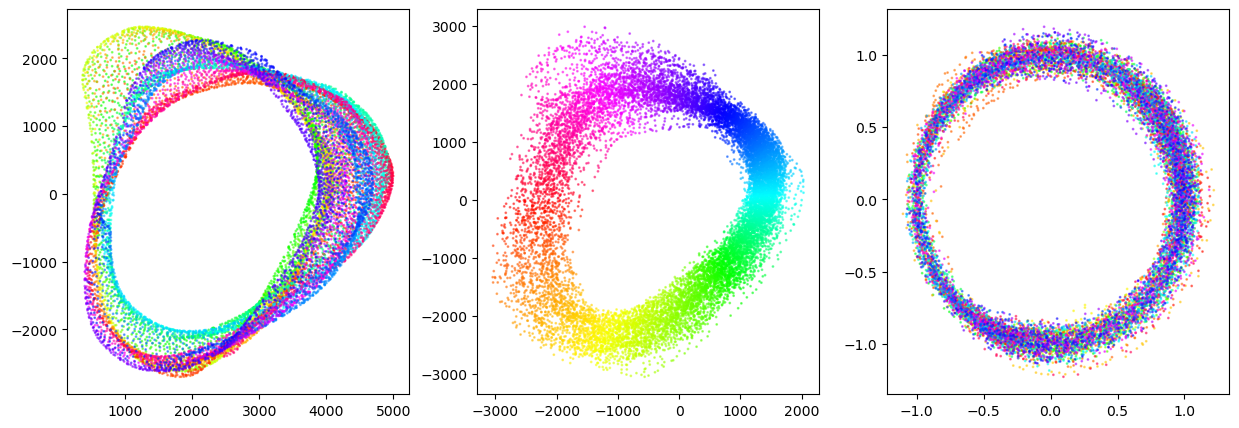

In [26]:
fig, ax = plt.subplots(1,3, figsize=(15, 5))

ax[0].scatter(ebcoords.eb_vertices_circ['radius'], 
           ebcoords.eb_vertices[:, 2], 
           c=ebcoords.eb_vertices_circ['phase'], 
           s=1, alpha=0.5, cmap='hsv')

xsec_x = ebcoords.eb_vertices_xsec['radius']*np.cos(ebcoords.eb_vertices_xsec['phase'])
xsec_y = ebcoords.eb_vertices_xsec['radius']*np.sin(ebcoords.eb_vertices_xsec['phase'])
ax[1].scatter(xsec_x, xsec_y,
              c=ebcoords.eb_vertices_xsec['phase'], s=1, alpha=.5, cmap='hsv')



x_sc = ebcoords.eb_vertices_xsec['radius_scaled']*np.cos(ebcoords.eb_vertices_xsec['phase'])
y_sc = ebcoords.eb_vertices_xsec['radius_scaled']*np.sin(ebcoords.eb_vertices_xsec['phase'])
ax[2].scatter(x_sc, y_sc,
              c=ebcoords.eb_vertices_circ['phase'], s=1, alpha=.5, cmap='hsv')
# ax.scatter(xsec_rad_scaled*np.cos(xsec_phase), xsec_rad_scaled*np.sin(xsec_phase), c=phase, s=1, alpha=0.5, cmap='hsv')